In [1]:
from collections import defaultdict
from matplotlib import pyplot as plt
from microhapdb import Marker
from microhapdb import markers as mk
import re

In [2]:
marker_counts = list()
locus_counts = list()
query = ""
for year in range(2015, 2024):
    if query != "":
        query += " | "
    query += f"Source.str.contains('{year}')"
    result = mk.query(query).copy()
    marker_counts.append(len(result))
    result["Locus"] = result.Name.apply(lambda x: x.split(".")[0])
    locus_counts.append(len(result.Locus.unique()))
print(marker_counts)
print(locus_counts)

[26, 26, 26, 249, 264, 538, 710, 1836, 3083]
[26, 26, 26, 246, 256, 483, 540, 1414, 2413]


/var/folders/c_/5x4wpqxd73923hskscprwxg1j8qmlk/T/ipykernel_15563/3224574515.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(range(2014, 2024))


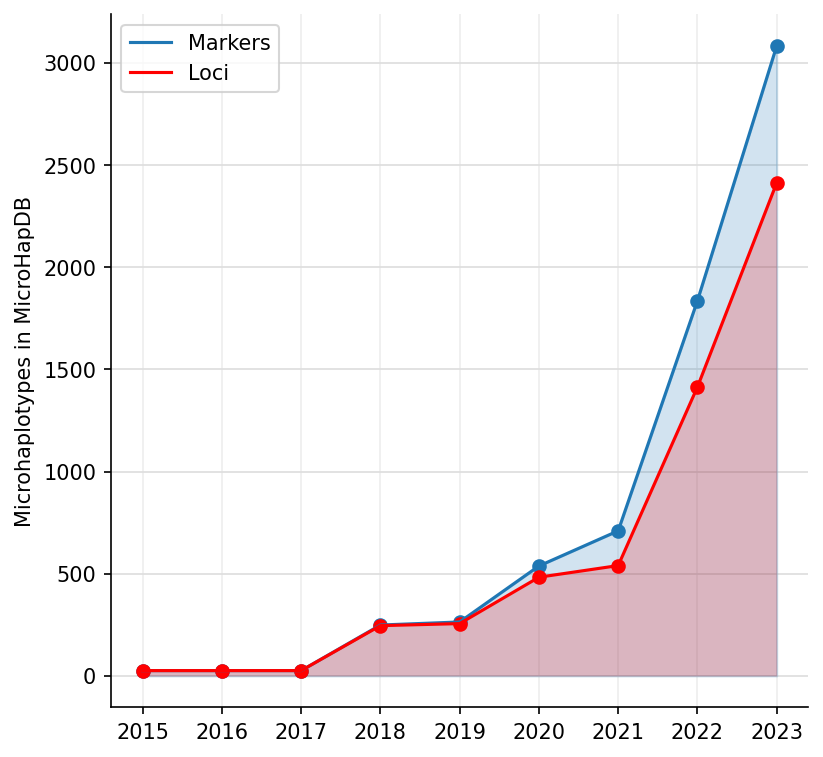

In [3]:
plt.figure(figsize=(6, 6), dpi=150)
plt.fill_between(range(len(marker_counts)), y1=marker_counts, color="#1f77b4", alpha=0.2)
plt.fill_between(range(len(locus_counts)), y1=locus_counts, linewidth=0.0, color="red", alpha=0.2)
plt.plot(range(len(marker_counts)), marker_counts, color="#1f77b4", label="Markers")
plt.plot(range(len(locus_counts)), locus_counts, color="red", label="Loci")
plt.scatter(range(len(marker_counts)), marker_counts, color="#1f77b4")
plt.scatter(range(len(locus_counts)), locus_counts, color="red")
plt.ylabel("Microhaplotypes in MicroHapDB")
plt.gca().set_xticklabels(range(2014, 2024))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().xaxis.grid(True, color="#EEEEEE")
plt.gca().yaxis.grid(True, color="#DDDDDD")
plt.gca().set_axisbelow(True)
plt.legend(loc="upper left")
plt.savefig("db-growth.png")